In [1]:
import pandas as pd
data = pd.read_csv('cleaned_data.csv')

In [4]:
Average = True # If mean of every semesters gpa wanted, change parameter Average to True
if not Average:
  gpa = 'Average Undergraduate Applicant High School GPA'
else:
  gpa_columns = [f'Semester {i} Cum GPA' for i in range(1, 9)]
  data['Total Cum GPA'] = data[gpa_columns].apply(lambda row: row[row.notna()].mean(), axis=1)
  gpa = 'Total Cum GPA'

df = data.dropna(subset=['Primary College Degree Program', 'Student Home Admission Publication Region', 'Total Cum GPA'])


# New Section

In [5]:
print(df.describe())
print(df['Primary College Degree Program'].unique())
print(df['Student Home Admission Publication Region'].unique())


       Student ID & Name  Primary Enrollment HEGIS  \
count         106.000000                106.000000   
mean          321.094340               1443.924528   
std           186.353148               1584.834254   
min             1.000000                 11.000000   
25%           171.500000                506.000000   
50%           318.000000                803.000000   
75%           505.750000               1922.500000   
max           613.000000               5558.000000   

       Average Undergraduate Applicant High School GPA  \
count                                       105.000000   
mean                                          3.884762   
std                                           0.308152   
min                                           2.800000   
25%                                           3.800000   
50%                                           3.900000   
75%                                           4.100000   
max                                           4.3

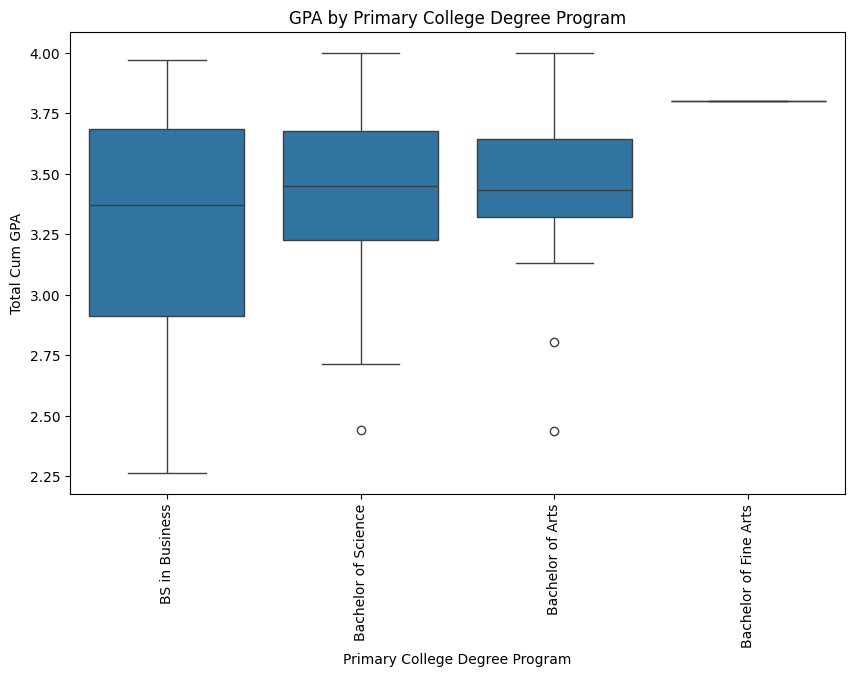

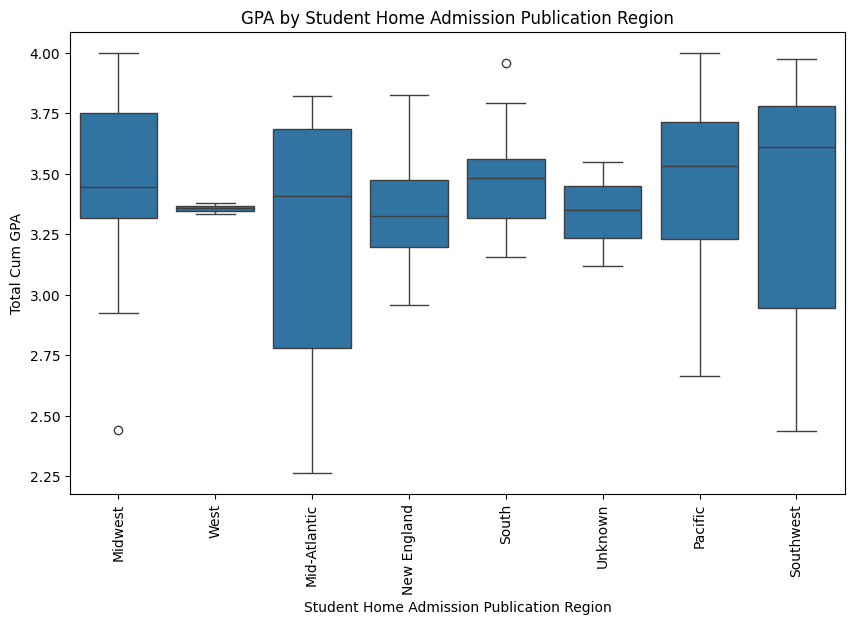

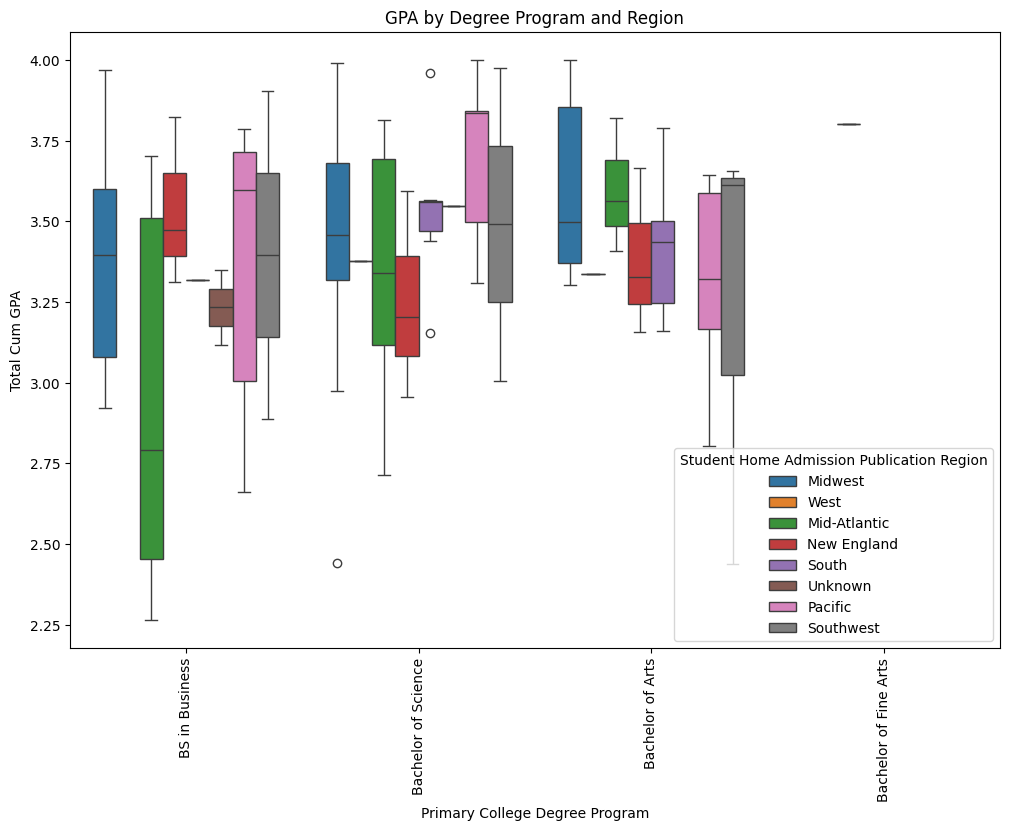

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Primary College Degree Program'] = df['Primary College Degree Program'].replace(
    {'Bachelor of Science in Business Administration': 'BS in Business'}
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Primary College Degree Program', y='Total Cum GPA', data=df)
plt.title('GPA by Primary College Degree Program')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Student Home Admission Publication Region', y='Total Cum GPA', data=df)
plt.title('GPA by Student Home Admission Publication Region')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Primary College Degree Program', y='Total Cum GPA', hue='Student Home Admission Publication Region', data=df)
plt.title('GPA by Degree Program and Region')
plt.xticks(rotation=90)
plt.show()


In [7]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_degree = f_oneway(*[df[df['Primary College Degree Program'] == program]['Total Cum GPA'] for program in df['Primary College Degree Program'].unique()])
print(f"ANOVA result for Degree Program: F-statistic = {anova_degree.statistic}, p-value = {anova_degree.pvalue}")

anova_region = f_oneway(*[df[df['Student Home Admission Publication Region'] == region]['Total Cum GPA'] for region in df['Student Home Admission Publication Region'].unique()])
print(f"ANOVA result for Region: F-statistic = {anova_region.statistic}, p-value = {anova_region.pvalue}")

model = ols('Q("Total Cum GPA") ~ C(Q("Primary College Degree Program")) * C(Q("Student Home Admission Publication Region"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

ANOVA result for Degree Program: F-statistic = 1.628979362875708, p-value = 0.18730424934611614
ANOVA result for Region: F-statistic = 0.6646294861509284, p-value = 0.7013762154108922
                                                       sum_sq    df         F  \
C(Q("Primary College Degree Program"))               0.234454   3.0  0.517048   
C(Q("Student Home Admission Publication Region"))    1.785878   7.0  1.687906   
C(Q("Primary College Degree Program")):C(Q("Stu...   2.785273  21.0  0.877492   
Residual                                            12.545373  83.0       NaN   

                                                      PR(>F)  
C(Q("Primary College Degree Program"))              0.598186  
C(Q("Student Home Admission Publication Region"))   0.191191  
C(Q("Primary College Degree Program")):C(Q("Stu...  0.579075  
Residual                                                 NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 13
  warnings.warn('covariance of constraints does not have full '


Lowest 3 GPA Combinations:
   Primary College Degree Program Student Home Admission Publication Region  \
0                  BS in Business                              Mid-Atlantic   
11               Bachelor of Arts                                 Southwest   
16            Bachelor of Science                               New England   

    Total Cum GPA  
0        2.955536  
11       3.234722  
16       3.243571  

Highest 3 GPA Combinations:
   Primary College Degree Program Student Home Admission Publication Region  \
7                Bachelor of Arts                                   Midwest   
17            Bachelor of Science                                   Pacific   
13          Bachelor of Fine Arts                              Mid-Atlantic   

    Total Cum GPA  
7        3.599375  
17       3.696550  
13       3.800000  


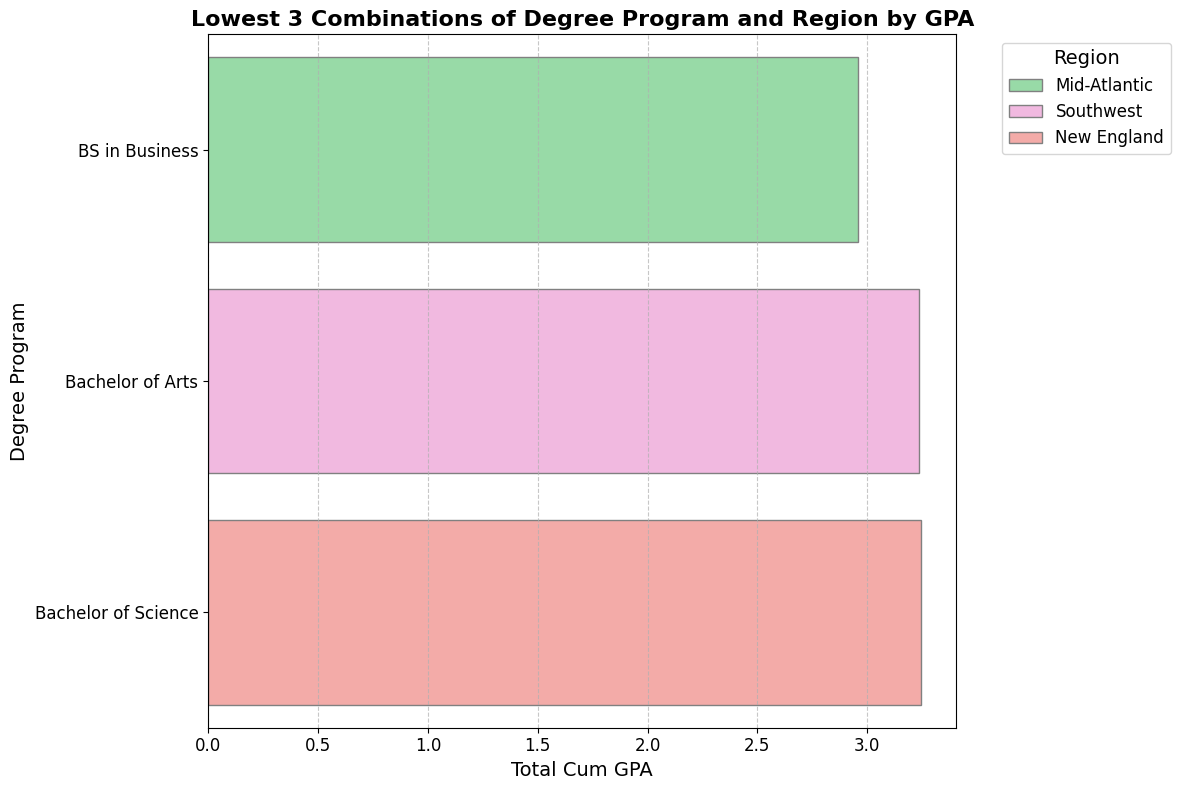

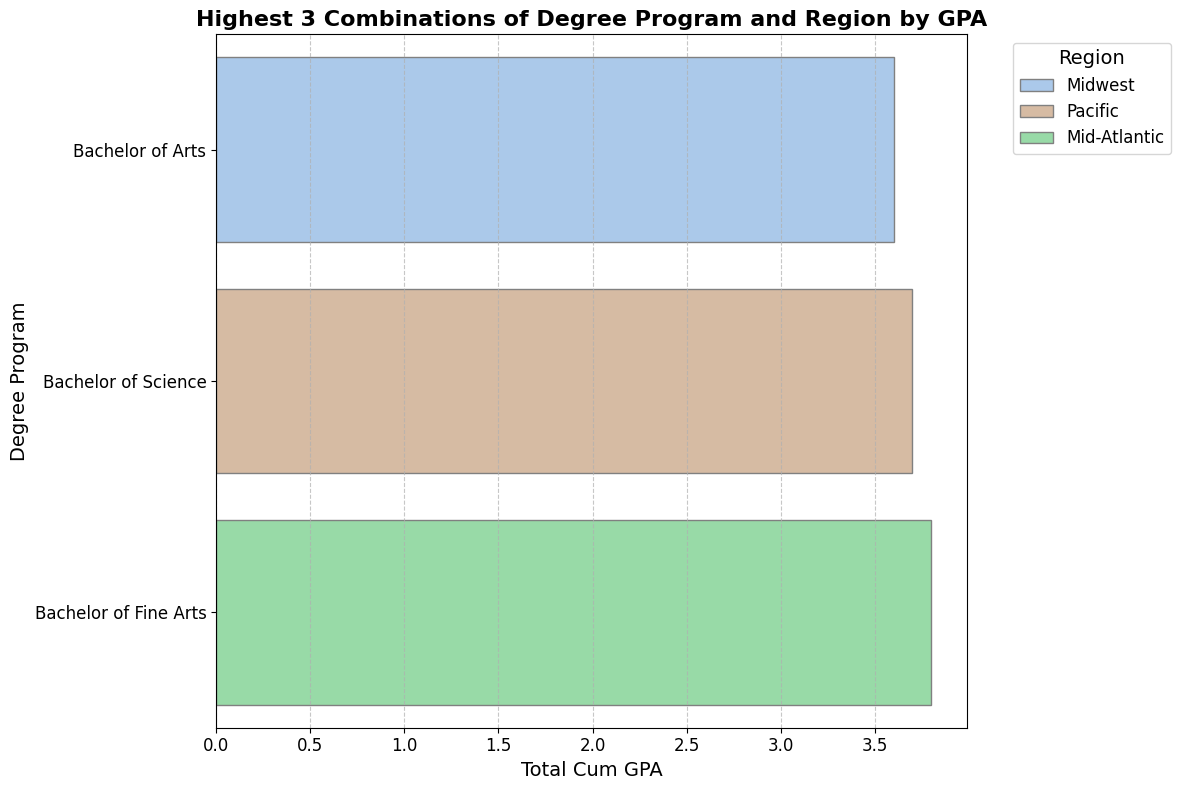

In [9]:
df = df.dropna(subset=['Primary College Degree Program', 'Student Home Admission Publication Region', 'Total Cum GPA'])
df = df[df['Primary College Degree Program'] != 'Unknown']
df = df[df['Student Home Admission Publication Region'] != 'Unknown']

grouped_df = df.groupby(['Primary College Degree Program', 'Student Home Admission Publication Region'])['Total Cum GPA'].mean().reset_index()
sorted_df = grouped_df.sort_values(by='Total Cum GPA')

lowest_3 = sorted_df.head(3)

highest_3 = sorted_df.tail(3)

print("Lowest 3 GPA Combinations:")
print(lowest_3)

print("\nHighest 3 GPA Combinations:")
print(highest_3)

unique_regions = df['Student Home Admission Publication Region'].unique()
region_colors = sns.color_palette("pastel", len(unique_regions))
region_color_mapping = {region: region_colors[i] for i, region in enumerate(unique_regions)}

def plot_combinations(data, title, filename):
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        x='Total Cum GPA',
        y='Primary College Degree Program',
        hue='Student Home Admission Publication Region',
        data=data,
        dodge=False,
        palette=region_color_mapping,
        edgecolor='gray'
    )
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Total Cum GPA', fontsize=14)
    plt.ylabel('Degree Program', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Region', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_combinations(lowest_3, 'Lowest 3 Combinations of Degree Program and Region by GPA', 'lowest_3_gpa.png')
plot_combinations(highest_3, 'Highest 3 Combinations of Degree Program and Region by GPA', 'highest_3_gpa.png')

Lowest 3 GPA Combinations:
   Primary College Degree Program Student Home Admission Publication Region  \
0                  BS in Business                              Mid-Atlantic   
11               Bachelor of Arts                                 Southwest   
16            Bachelor of Science                               New England   

    Total Cum GPA  
0        2.955536  
11       3.234722  
16       3.243571  

Highest 3 GPA Combinations:
   Primary College Degree Program Student Home Admission Publication Region  \
7                Bachelor of Arts                                   Midwest   
17            Bachelor of Science                                   Pacific   
13          Bachelor of Fine Arts                              Mid-Atlantic   

    Total Cum GPA  
7        3.599375  
17       3.696550  
13       3.800000  


<ipython-input-11-93e81aed7fd7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_3['Primary College Degree Program'] = lowest_3['Primary College Degree Program'].replace(degree_short_mapping)
<ipython-input-11-93e81aed7fd7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_3['Primary College Degree Program'] = highest_3['Primary College Degree Program'].replace(degree_short_mapping)


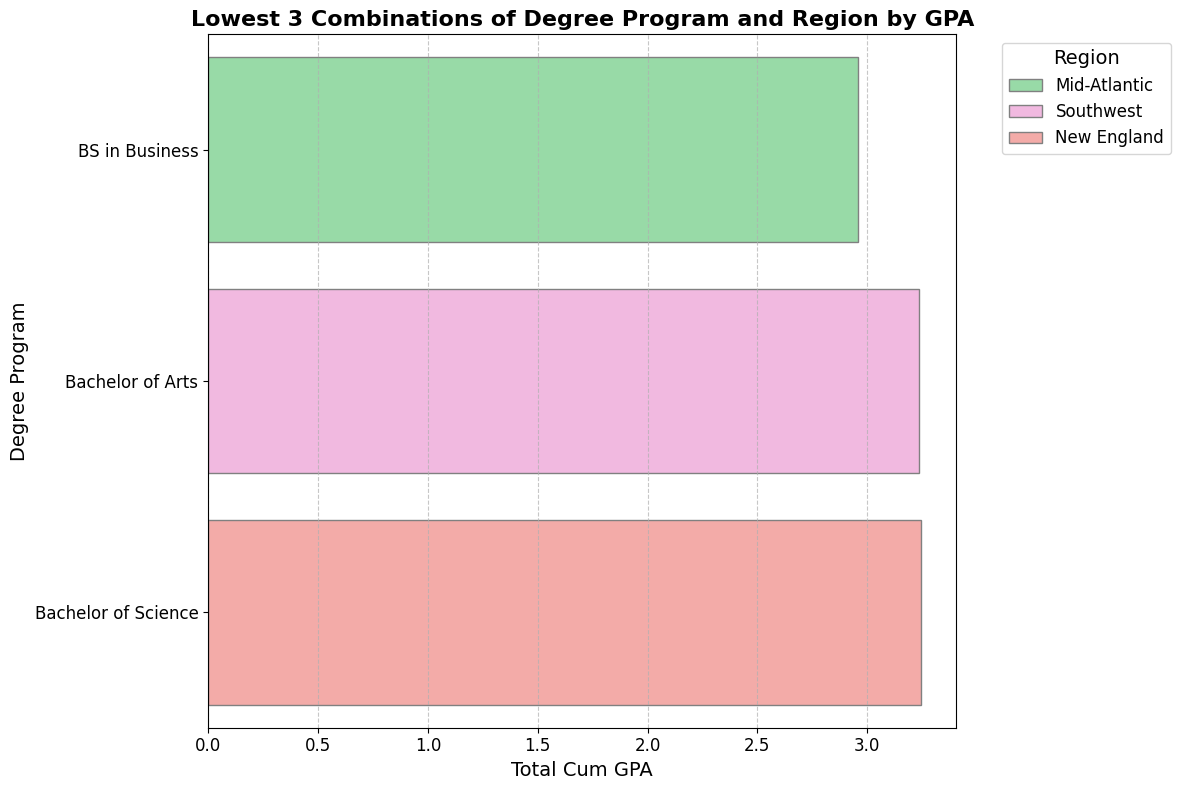

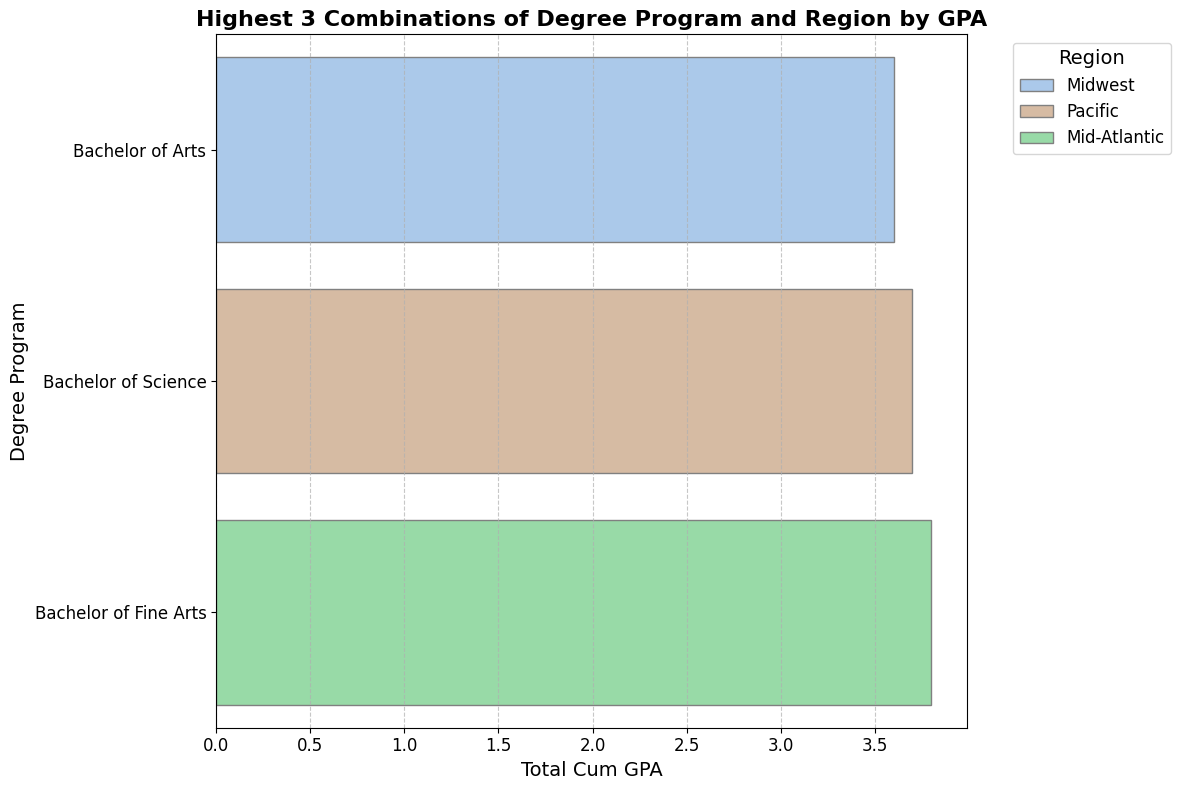

In [11]:
df = df.dropna(subset=['Primary College Degree Program', 'Student Home Admission Publication Region', 'Total Cum GPA'])
df = df[df['Primary College Degree Program'] != 'Unknown']
df = df[df['Student Home Admission Publication Region'] != 'Unknown']

grouped_df = df.groupby(['Primary College Degree Program', 'Student Home Admission Publication Region'])['Total Cum GPA'].mean().reset_index()

sorted_df = grouped_df.sort_values(by='Total Cum GPA')
lowest_3 = sorted_df.head(3)
highest_3 = sorted_df.tail(3)

print("Lowest 3 GPA Combinations:")
print(lowest_3)

print("\nHighest 3 GPA Combinations:")
print(highest_3)

unique_regions = df['Student Home Admission Publication Region'].unique()
region_colors = sns.color_palette("pastel", len(unique_regions))
region_color_mapping = {region: region_colors[i] for i, region in enumerate(unique_regions)}

degree_short_mapping = {
    'Bachelor of Science in Business Administration': 'BS of Business',
}
lowest_3['Primary College Degree Program'] = lowest_3['Primary College Degree Program'].replace(degree_short_mapping)
highest_3['Primary College Degree Program'] = highest_3['Primary College Degree Program'].replace(degree_short_mapping)

def plot_combinations(data, title, filename):
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        x='Total Cum GPA',
        y='Primary College Degree Program',
        hue='Student Home Admission Publication Region',
        data=data,
        dodge=False,
        palette=region_color_mapping,
        edgecolor='gray'
    )
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Total Cum GPA', fontsize=14)
    plt.ylabel('Degree Program', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Region', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_combinations(lowest_3, 'Lowest 3 Combinations of Degree Program and Region by GPA', 'lowest_3_gpa.png')
plot_combinations(highest_3, 'Highest 3 Combinations of Degree Program and Region by GPA', 'highest_3_gpa.png')